In [2]:
# Import
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import os
from sqlalchemy import create_engine

In [3]:
# Engine
sqlalchemy_engine = create_engine('mssql+pyodbc://@APELSINAS77\\DEVSERVER/Apelsinas?driver=ODBC+Driver+18+for+SQL+Server&Trusted_Connection=yes&TrustServerCertificate=yes')

In [4]:
# Read the data
table_name = 'COVID19_vacines'
query = f"SELECT * FROM {table_name}"
vac_df = pd.read_sql(query, sqlalchemy_engine)

table_name = 'COVID19_case_death'
query = f"SELECT * FROM {table_name}"
cases_df = pd.read_sql(query, sqlalchemy_engine)

table_name = 'COVID19_hospitals'
query = f"SELECT * FROM {table_name}"
hospitals_df = pd.read_sql(query, sqlalchemy_engine)

In [5]:
# Check for nulls
mv_v = vac_df.isnull().sum()
print(mv_v[mv_v > 0])

mv_c = cases_df.isnull().sum()
print(mv_c[mv_c > 0])

mv_h = hospitals_df.isnull().sum()
print(mv_h[mv_h > 0])

birth_year_noisy     466
vacc_org_muni       1187
dtype: int64
Series([], dtype: int64)
icu_ecmo_systems_total_r7mean      3017
icu_ecmo_systems_in_use_r7mean     3017
cv19_hospital_beds_assigned_r7m     501
cv19_oxygen_beds_assigned_r7mea     501
cv19_mv_beds_assigned_r7mean       3017
cv19_mv_beds_occupied_r7mean       3017
cv19_icu_beds_assigned_r7mean       501
cv19_icu_mv_beds_assigned_r7mea     501
cv19_icu_highflow_systems_total     501
cv19_icu_highflow_systems_in_us     501
cv19_icu_ecmo_assigned_r7mean       501
cv19_icu_ecmo_in_use_r7mean         501
cv19_admissions_r7mean             3017
remdesivir_vials_used_r7mean          2
remdesivir_patients_new_r7mean        6
dtype: int64


In [6]:
# Drop nulls
vac_df = vac_df.dropna()
cases_df = cases_df.dropna()
hospitals_df = hospitals_df.dropna()

In [8]:
vac_df.head()

,object_id,pseudo_id,birth_year_noisy,sex,muni_declared,muni_policlin,vaccination_date,dose_number,drug_manufacturer,drug_name_common,vacc_org_name,vacc_org_muni
0,1,35DC7E4C89D,2001,M,Vilniaus m. sav.,Vilniaus m. sav.,2021/09/17 00:00:00+00,1,Pfizer-BioNTech,Comirnaty,Viešoji istaiga Karoliniškiu poliklinika,Vilniaus m. sav.
1,2,35DC7E4C89D,2001,M,Vilniaus m. sav.,Vilniaus m. sav.,2021/10/08 00:00:00+00,2,Pfizer-BioNTech,Comirnaty,Viešoji istaiga Karoliniškiu poliklinika,Vilniaus m. sav.
2,3,3AD852E6A7B,1990,M,Vilniaus m. sav.,Vilniaus m. sav.,2021/06/25 00:00:00+00,1,Johnson & Johnson,Janssen,Viešoji istaiga Nacionalinis kraujo centras,Vilniaus m. sav.
3,4,62E240BEFD1,1974,M,Vilniaus m. sav.,Vilniaus m. sav.,2021/08/20 00:00:00+00,1,Pfizer-BioNTech,Comirnaty,Viešoji istaiga Karoliniškiu poliklinika,Vilniaus m. sav.
4,5,62E240BEFD1,1974,M,Vilniaus m. sav.,Vilniaus m. sav.,2021/09/10 00:00:00+00,2,Pfizer-BioNTech,Comirnaty,Viešoji istaiga Karoliniškiu poliklinika,Vilniaus m. sav.


In [44]:
hospitals_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32922 entries, 0 to 32942
Data columns (total 37 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   X                                32922 non-null  float64
 1   Y                                32922 non-null  float64
 2   object_id                        32922 non-null  int64  
 3   date                             32922 non-null  object 
 4   hospital_name                    32922 non-null  object 
 5   healthcare_region                32922 non-null  object 
 6   hospital_beds_total_r7mean       32922 non-null  int64  
 7   hospital_beds_occupied_r7mean    32922 non-null  int64  
 8   oxygen_beds_total_r7mean         32922 non-null  int64  
 9   oxygen_beds_occupied_r7mean      32922 non-null  int64  
 10  mv_beds_total_r7mean             32922 non-null  int64  
 11  mv_beds_occupied_r7mean          32922 non-null  int64  
 12  icu_beds_total_r7mean  

In [18]:
print(vac_df.dtypes)

object_id                     int64
pseudo_id                    object
birth_year_noisy              int32
sex                          object
muni_declared                object
muni_policlin                object
vaccination_date     datetime64[ns]
dose_number                   int64
drug_manufacturer            object
drug_name_common             object
vacc_org_name                object
vacc_org_muni                object
dtype: object


In [7]:
# Convert year to int
vac_df['birth_year_noisy'] = vac_df['birth_year_noisy'].astype(int)

In [9]:
# Convert vaccination date to datetime, ignore timezones
vac_df['vaccination_date'] = pd.to_datetime(vac_df['vaccination_date'], errors='coerce').dt.tz_localize(None)


In [15]:
vac_df.head()

,object_id,pseudo_id,birth_year_noisy,sex,muni_declared,muni_policlin,vaccination_date,dose_number,drug_manufacturer,drug_name_common,vacc_org_name,vacc_org_muni
0,1,35DC7E4C89D,2001,M,Vilniaus m. sav.,Vilniaus m. sav.,2021-09-17 00:00:00+00:00,1,Pfizer-BioNTech,Comirnaty,Viešoji istaiga Karoliniškiu poliklinika,Vilniaus m. sav.
1,2,35DC7E4C89D,2001,M,Vilniaus m. sav.,Vilniaus m. sav.,2021-10-08 00:00:00+00:00,2,Pfizer-BioNTech,Comirnaty,Viešoji istaiga Karoliniškiu poliklinika,Vilniaus m. sav.
2,3,3AD852E6A7B,1990,M,Vilniaus m. sav.,Vilniaus m. sav.,2021-06-25 00:00:00+00:00,1,Johnson & Johnson,Janssen,Viešoji istaiga Nacionalinis kraujo centras,Vilniaus m. sav.
3,4,62E240BEFD1,1974,M,Vilniaus m. sav.,Vilniaus m. sav.,2021-08-20 00:00:00+00:00,1,Pfizer-BioNTech,Comirnaty,Viešoji istaiga Karoliniškiu poliklinika,Vilniaus m. sav.
4,5,62E240BEFD1,1974,M,Vilniaus m. sav.,Vilniaus m. sav.,2021-09-10 00:00:00+00:00,2,Pfizer-BioNTech,Comirnaty,Viešoji istaiga Karoliniškiu poliklinika,Vilniaus m. sav.


In [21]:
print(cases_df.dtypes)

object_id                     int64
municipality_name            object
date                 datetime64[ns]
sex                          object
age_gr                       object
incidence                     int64
infection_1                   int64
infection_2                   int64
infection_3                   int64
infection_4                   int64
deaths_all                    int64
deaths_cov1                   int64
deaths_cov2                   int64
deaths_cov3                   int64
dtype: object


In [11]:
# Convert vaccination date to datetime
cases_df['date'] = pd.to_datetime(cases_df['date'], errors='coerce').dt.tz_localize(None)


In [12]:
cases_df.head()

,object_id,municipality_name,date,sex,age_gr,incidence,infection_1,infection_2,infection_3,infection_4,deaths_all,deaths_cov1,deaths_cov2,deaths_cov3
0,1,Taurages r. sav.,2020-02-01,Moteris,60-69,0,0,0,0,0,1,0,0,0
1,2,Kalvarijos sav.,2020-02-01,Moteris,70-79,0,0,0,0,0,1,0,0,0
2,3,Vilniaus m. sav.,2020-02-01,Moteris,80-89,0,0,0,0,0,2,0,0,0
3,4,Kauno m. sav.,2020-02-01,Moteris,80-89,0,0,0,0,0,2,0,0,0
4,5,Akmenes r. sav.,2020-02-01,Moteris,80-89,0,0,0,0,0,1,0,0,0


In [25]:
print(hospitals_df.dtypes)

X                                         float64
Y                                         float64
object_id                                   int64
date                               datetime64[ns]
hospital_name                              object
healthcare_region                          object
hospital_beds_total_r7mean                  int64
hospital_beds_occupied_r7mean               int64
oxygen_beds_total_r7mean                    int64
oxygen_beds_occupied_r7mean                 int64
mv_beds_total_r7mean                        int64
mv_beds_occupied_r7mean                     int64
icu_beds_total_r7mean                       int64
icu_beds_occupied_r7mean                    int64
icu_ecmo_systems_total_r7mean             float64
icu_ecmo_systems_in_use_r7mean            float64
cv19_hospital_beds_assigned_r7m           float64
cv19_hospital_beds_occupied_r7m             int64
cv19_oxygen_beds_assigned_r7mea           float64
cv19_oxygen_beds_occupied_r7mea             int64


In [13]:
# Convert vaccination date to datetime
hospitals_df['date'] = pd.to_datetime(hospitals_df['date'], errors='coerce').dt.tz_localize(None)

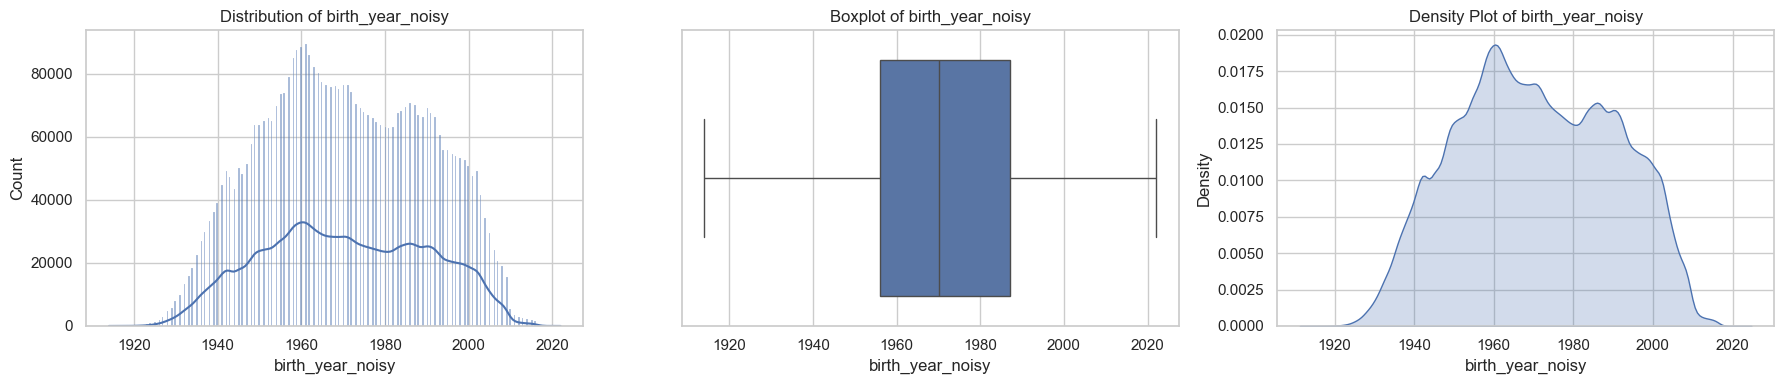

In [14]:
col = 'birth_year_noisy'

# Set up the matplotlib figure with multiple subplots using seaborn's style
sns.set(style="whitegrid")

# Create a figure for the subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 4))

# Histogram with a Kernel Density Estimate (KDE) on the first subplot
sns.histplot(vac_df[col], kde=True, ax=axes[0])
axes[0].set_title(f'Distribution of {col}')

# Boxplot on the second subplot
sns.boxplot(x=vac_df[col], ax=axes[1])
axes[1].set_title(f'Boxplot of {col}')

# KDE plot on the third subplot
sns.kdeplot(vac_df[col], fill=True, ax=axes[2])
axes[2].set_title(f'Density Plot of {col}')

# Display the plots
plt.tight_layout()
plt.show()


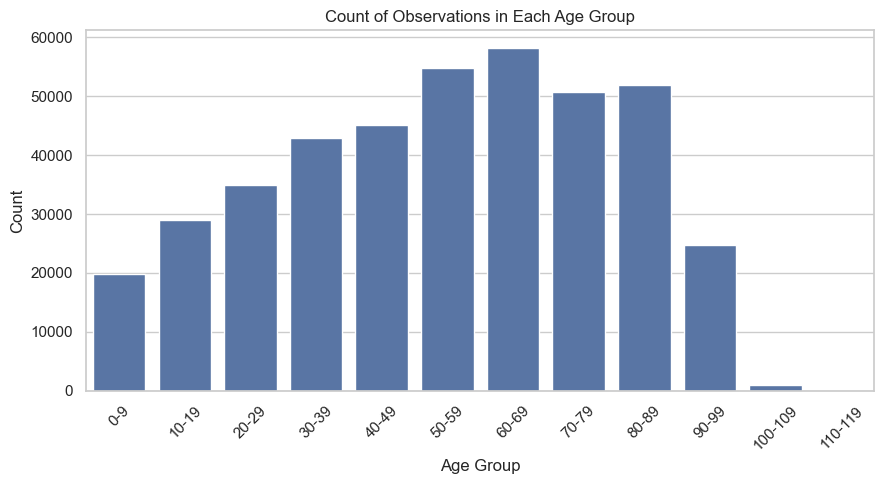

In [15]:
# Sorting the 'age_group' categories by the starting age
cases_df_filtered = cases_df[cases_df['age_gr'] != 'Nenustatyta']
age_group_sorted = sorted(cases_df_filtered['age_gr'].unique(), key=lambda x: int(x.split('-')[0]))

# Count plot for the 'age_group' column with sorted order
plt.figure(figsize=(9, 5))
sns.countplot(x='age_gr', data=cases_df_filtered, order=age_group_sorted)
plt.title('Count of Observations in Each Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotates the labels to prevent overlap
plt.tight_layout()
plt.show()


In [19]:
a = cases_df.head(100)
b = vac_df.head(100)
c = hospitals_df.head(100)

In [20]:
a.to_csv('cases_deaths.csv', index=False)
b.to_csv('vaccines.csv', index=False)
c.to_csv('hospitals.csv', index=False)

In [18]:
hospitals_df.head()

,X,Y,object_id,date,hospital_name,healthcare_region,hospital_beds_total_r7mean,hospital_beds_occupied_r7mean,oxygen_beds_total_r7mean,oxygen_beds_occupied_r7mean,...,cv19_icu_highflow_systems_in_us,cv19_icu_ecmo_assigned_r7mean,cv19_icu_ecmo_in_use_r7mean,cv19_admissions_r7mean,cv19_admissions_oxygen_r7mean,cv19_admissions_mv_r7mean,cv19_discharges_r7mean,remdesivir_vials_used_r7mean,remdesivir_patients_total_r7mea,remdesivir_patients_new_r7mean
0,499001.0592,6.130448e+06,1,2023-11-04,VšI Kedainiu ligonine,Kauno regionas,223,146,78,10,...,0.0,0.0,0.0,0.0,0,0,0,0.0,0,0.0
1,490930.5788,6.086576e+06,2,2023-11-04,VšI Lietuvos sveikatos mokslu universiteto Kau...,Kauno regionas,818,619,364,90,...,0.0,0.0,0.0,7.0,4,0,6,14.0,10,2.0
2,319623.0276,6.183832e+06,3,2023-11-04,VšI Klaipedos Jurininku ligonine,Klaipedos regionas,323,222,300,210,...,0.0,0.0,0.0,3.0,3,0,1,0.0,0,0.0
3,319632.5984,6.183650e+06,4,2023-11-04,VšI Klaipedos universitetine ligonine,Klaipedos regionas,748,393,412,21,...,0.0,0.0,0.0,1.0,1,0,4,0.0,0,0.0
4,320052.0276,6.179278e+06,5,2023-11-04,VšI Klaipedos vaiku ligonine,Klaipedos regionas,152,77,58,1,...,0.0,0.0,0.0,0.0,0,0,1,0.0,0,0.0


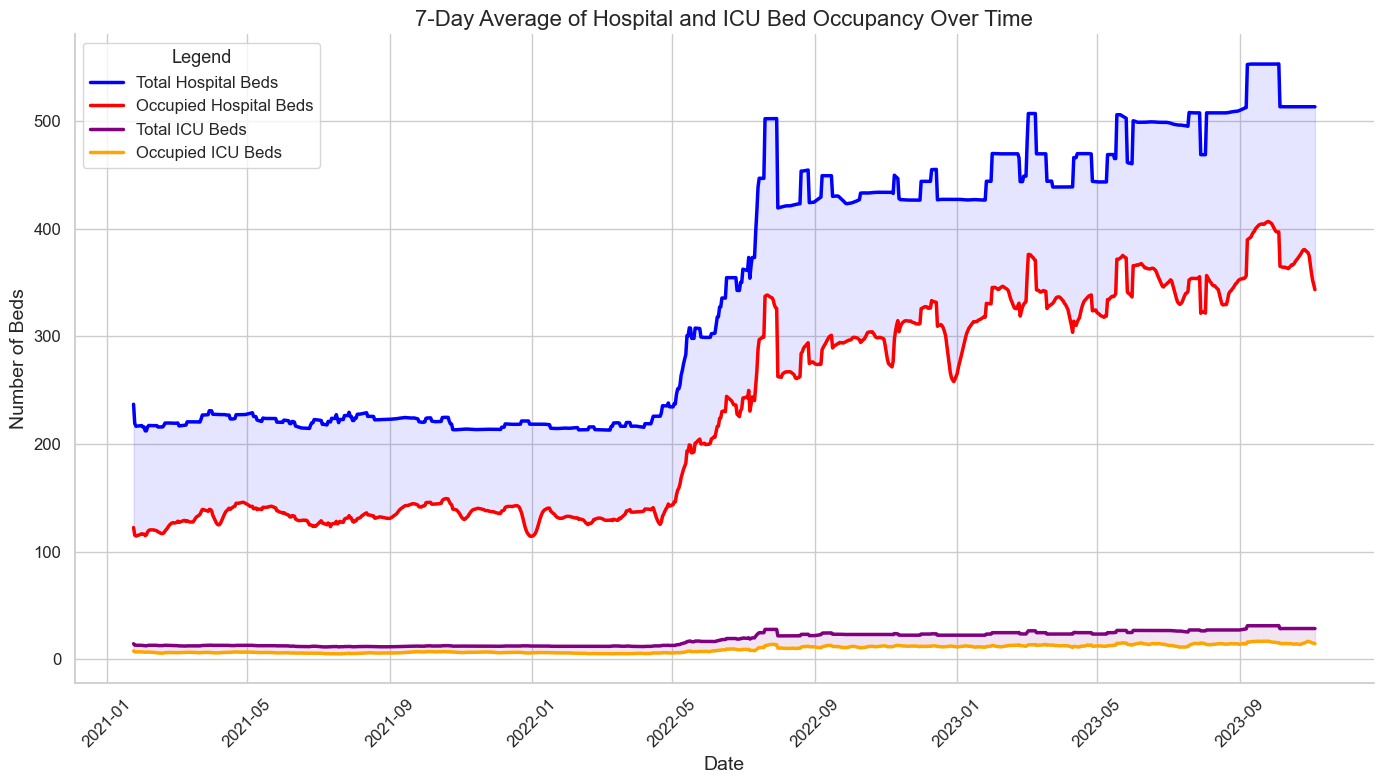

In [23]:
# Let's fix the issue with the blue filling spilling out by ensuring the fill is between the appropriate lines
plt.figure(figsize=(14, 8))

# Using the seaborn style for a better visual appearance
sns.set(style="whitegrid")

# Plotting hospital beds data
sns.lineplot(data=hospital_daily_averages, x='date', y='hospital_beds_total_r7mean', 
             label='Total Hospital Beds', color='blue', linewidth=2.5)
sns.lineplot(data=hospital_daily_averages, x='date', y='hospital_beds_occupied_r7mean', 
             label='Occupied Hospital Beds', color='red', linewidth=2.5)

# Plotting ICU beds data
sns.lineplot(data=hospital_daily_averages, x='date', y='icu_beds_total_r7mean', 
             label='Total ICU Beds', color='purple', linewidth=2.5)
sns.lineplot(data=hospital_daily_averages, x='date', y='icu_beds_occupied_r7mean', 
             label='Occupied ICU Beds', color='orange', linewidth=2.5)

# Filling the area between the lines for hospital beds
plt.fill_between(hospital_daily_averages.date, 
                 hospital_daily_averages.hospital_beds_occupied_r7mean, 
                 hospital_daily_averages.hospital_beds_total_r7mean, 
                 color="blue", alpha=0.1)

# Filling the area between the lines for ICU beds
plt.fill_between(hospital_daily_averages.date, 
                 hospital_daily_averages.icu_beds_occupied_r7mean, 
                 hospital_daily_averages.icu_beds_total_r7mean, 
                 color="purple", alpha=0.1)

# Enhancing and labeling the plot
plt.title('7-Day Average of Hospital and ICU Bed Occupancy Over Time', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Beds', fontsize=14)
plt.legend(title='Legend', title_fontsize='13', fontsize='12')
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

# Remove the top and right spines for a cleaner look
sns.despine()

# Adjust the plot to fit the date labels
plt.tight_layout()

# Show plot
plt.show()


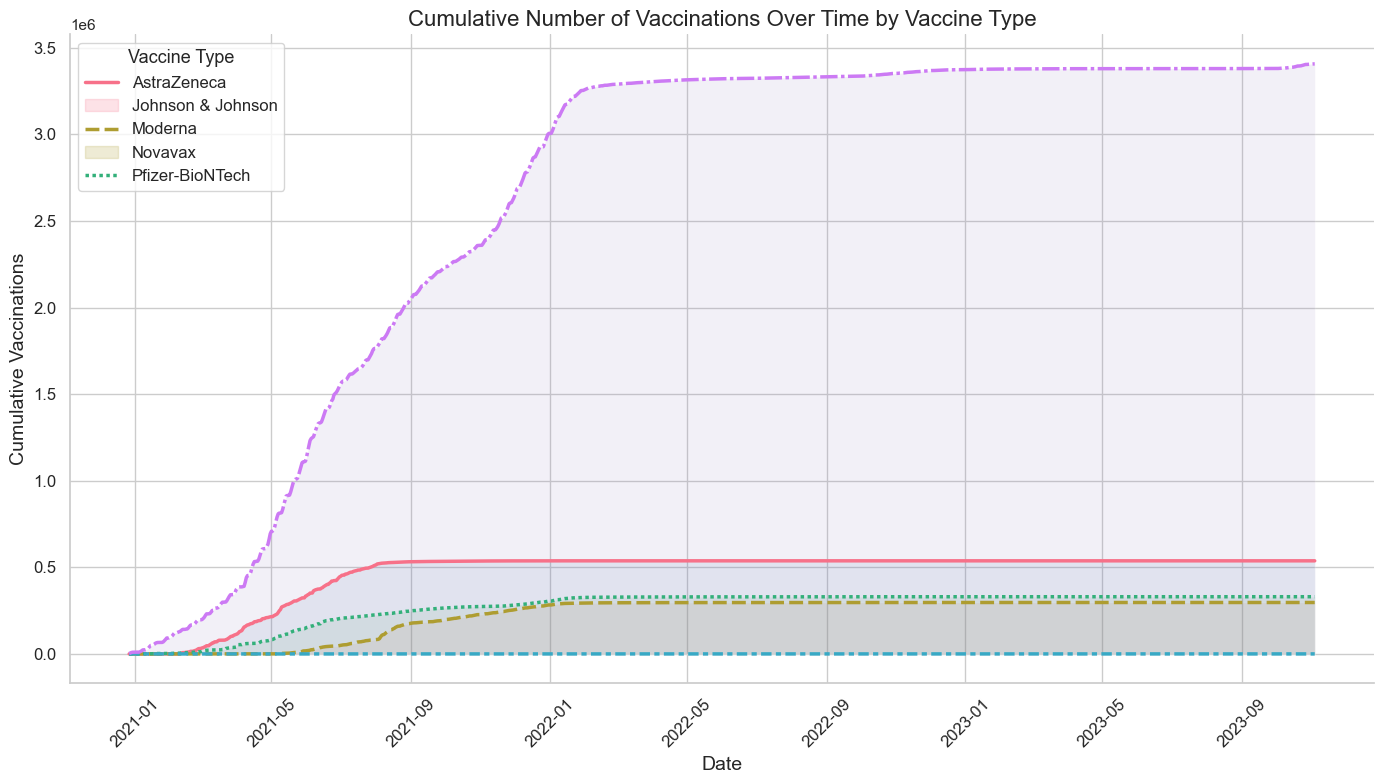

In [24]:
# For the vaccination trends, we'll plot a time series of vaccinations over time, separated by vaccine type.

# Convert 'vaccination_date' to datetime in the vaccine data
vac_df['vaccination_date'] = pd.to_datetime(vac_df['vaccination_date'])

# Prepare data for plotting: count the number of vaccinations per day for each vaccine type
vaccine_trends = vac_df.groupby(['vaccination_date', 'drug_manufacturer']).size().reset_index(name='counts')

# Pivot the table to have vaccine types as columns and dates as rows
vaccine_trends_pivot = vaccine_trends.pivot(index='vaccination_date', columns='drug_manufacturer', values='counts').fillna(0).cumsum()

# Plotting
plt.figure(figsize=(14, 8))
palette = sns.color_palette("husl", vaccine_trends_pivot.columns.size)

sns.lineplot(data=vaccine_trends_pivot, palette=palette, linewidth=2.5)

plt.title('Cumulative Number of Vaccinations Over Time by Vaccine Type', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Cumulative Vaccinations', fontsize=14)
plt.legend(title='Vaccine Type', title_fontsize='13', fontsize='12', labels=vaccine_trends_pivot.columns)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

# Fill the area under each line
for manufacturer in vaccine_trends_pivot.columns:
    plt.fill_between(vaccine_trends_pivot.index, vaccine_trends_pivot[manufacturer], alpha=0.1)

sns.despine()
plt.tight_layout()
plt.show()


In [28]:
import geopandas as gpd

# Load the .geojson file
geojson_path = 'data/COVID19_map.geojson'
geo_data = gpd.read_file(geojson_path)

# Display the first few rows to understand its structure
geo_data.head()


,object_id,date,hospital_name,healthcare_region,hospital_beds_total_r7mean,hospital_beds_occupied_r7mean,oxygen_beds_total_r7mean,oxygen_beds_occupied_r7mean,mv_beds_total_r7mean,mv_beds_occupied_r7mean,...,cv19_icu_ecmo_assigned_r7mean,cv19_icu_ecmo_in_use_r7mean,cv19_admissions_r7mean,cv19_admissions_oxygen_r7mean,cv19_admissions_mv_r7mean,cv19_discharges_r7mean,remdesivir_vials_used_r7mean,remdesivir_patients_total_r7mea,remdesivir_patients_new_r7mean,geometry
0,1,2023-11-04,VšĮ Kėdainių ligoninė,Kauno regionas,223.0,146.0,78.0,10.0,6.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,POINT (23.98427 55.30940)
1,2,2023-11-04,VšĮ Lietuvos sveikatos mokslų universiteto Kau...,Kauno regionas,818.0,619.0,364.0,90.0,31.0,9.0,...,0.0,0.0,7.0,4.0,0.0,6.0,14.0,10.0,2.0,POINT (23.85855 54.91514)
2,3,2023-11-04,VšĮ Klaipėdos Jūrininkų ligoninė,Klaipėdos regionas,323.0,222.0,300.0,210.0,21.0,5.0,...,0.0,0.0,3.0,3.0,0.0,1.0,0.0,0.0,0.0,POINT (21.12611 55.75538)
3,4,2023-11-04,VšĮ Klaipėdos universitetinė ligoninė,Klaipėdos regionas,748.0,393.0,412.0,21.0,35.0,11.0,...,0.0,0.0,1.0,1.0,0.0,4.0,0.0,0.0,0.0,POINT (21.12638 55.75376)
4,5,2023-11-04,VšĮ Klaipėdos vaikų ligoninė,Klaipėdos regionas,152.0,77.0,58.0,1.0,6.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,POINT (21.13593 55.71468)


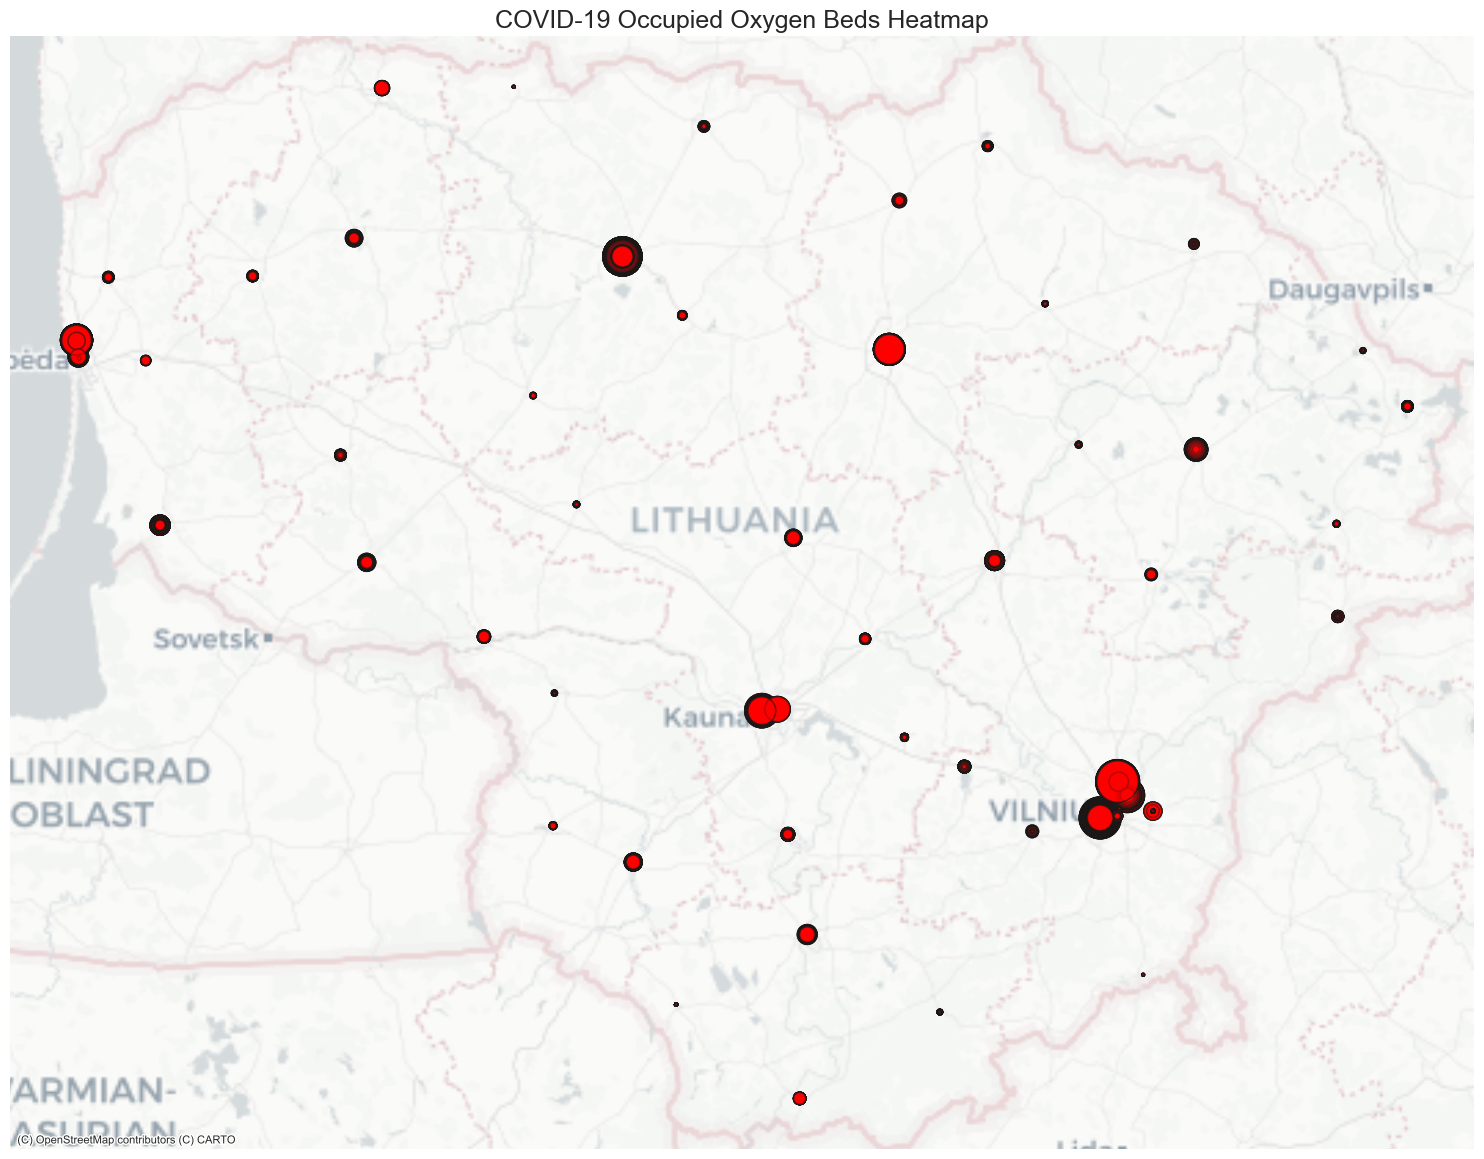

In [31]:
import contextily as ctx

# To create a heatmap, we'll need to convert our GeoDataFrame to a format that contextily can use to overlay on a tile map.
# We'll also normalize the data for oxygen_beds_occupied_r7mean to get a better visual representation.

# First, we need to ensure that the data is in the correct projection for web mapping (Web Mercator)
geo_data_corrected = geo_data.to_crs(epsg=3857)

# Normalize the 'oxygen_beds_occupied_r7mean' column for better visualization

max_beds = geo_data_corrected['oxygen_beds_occupied_r7mean'].max()

# Normalize the 'oxygen_beds_occupied_r7mean' column for better visualization
geo_data_corrected['beds_occupied_normalized'] = geo_data_corrected['oxygen_beds_occupied_r7mean'] / max_beds

# Generate the plot again with the corrected normalization
fig, ax = plt.subplots(figsize=(15, 15))
geo_data_corrected.plot(ax=ax, 
                        markersize=geo_data_corrected['beds_occupied_normalized'] * 1000,  # Adjust size here
                        color='red', 
                        alpha=0.5,  # Adjust alpha transparency here
                        edgecolor='k')

# Adding a title to the plot
ax.set_title('COVID-19 Occupied Oxygen Beds Heatmap', fontdict={'fontsize': '18', 'fontweight' : '3'})

# Remove the axes for a cleaner look
ax.set_axis_off()

# Add basemap
ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron)

# Adjust the plot to make sure everything is visible
plt.tight_layout()

# Show the plot
plt.show()


In [34]:
# Dropping rows where the 'sex' column has the value "Nenustatyta"
cases_df_cleaned = cases_df[cases_df['sex'] != "Nenustatyta"].copy()

# Confirming the rows are dropped by checking the unique values in 'sex' column
cases_df_cleaned['sex'].unique()


array(['Moteris', 'Vyras'], dtype=object)

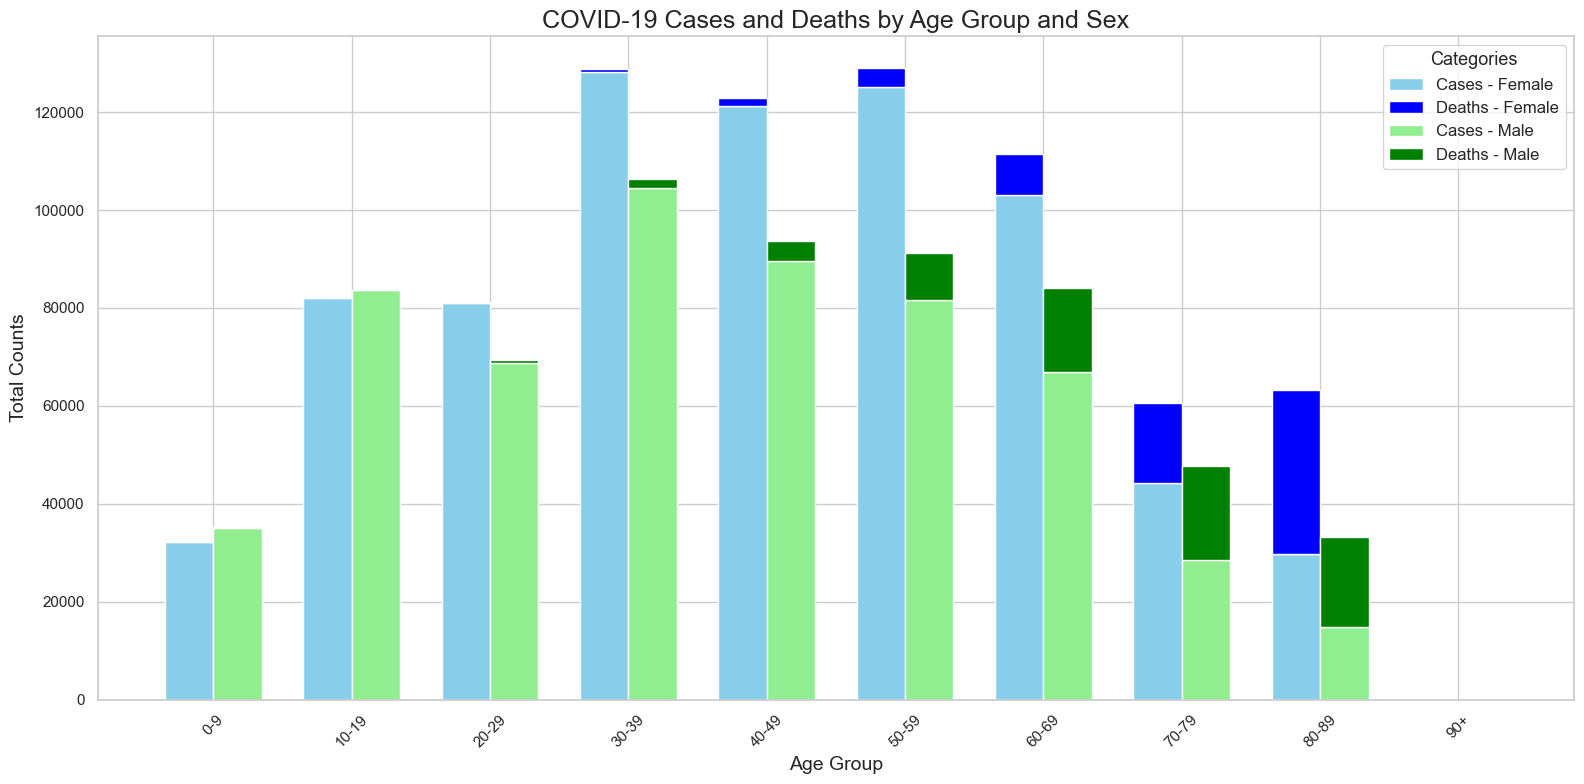

In [37]:
import numpy as np

# Aggregate the data for cases and deaths by age group and sex
cleaned_demographic_data = cases_df_cleaned.groupby(['age_gr', 'sex']).agg(
    total_cases=pd.NamedAgg(column='incidence', aggfunc='sum'),
    total_deaths=pd.NamedAgg(column='deaths_all', aggfunc='sum')
).reset_index()

# Sort the age groups
age_order = ['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89', '90+']
cleaned_demographic_data['age_gr'] = pd.Categorical(cleaned_demographic_data['age_gr'], categories=age_order, ordered=True)

# Pivot the DataFrame to have separate columns for each sex and case/death
demographic_pivot = cleaned_demographic_data.pivot_table(index='age_gr', columns='sex', 
                                                         values=['total_cases', 'total_deaths'], 
                                                         aggfunc='sum').fillna(0)

# Flatten the columns after pivoting
demographic_pivot.columns = ['_'.join(col).strip() for col in demographic_pivot.columns.values]

# Create the figure and axis objects
plt.figure(figsize=(16, 8))
ax = plt.gca()

# Plotting cases and deaths for each sex side by side within each age group
width = 0.35  # Width of the bars
x = np.arange(len(demographic_pivot))

ax.bar(x - width/2, demographic_pivot['total_cases_Moteris'], width, label='Cases - Female', color='skyblue')
ax.bar(x - width/2, demographic_pivot['total_deaths_Moteris'], width, label='Deaths - Female', color='blue', bottom=demographic_pivot['total_cases_Moteris'])

ax.bar(x + width/2, demographic_pivot['total_cases_Vyras'], width, label='Cases - Male', color='lightgreen')
ax.bar(x + width/2, demographic_pivot['total_deaths_Vyras'], width, label='Deaths - Male', color='green', bottom=demographic_pivot['total_cases_Vyras'])

# Set the labels and title
ax.set_xlabel('Age Group', fontsize=14)
ax.set_ylabel('Total Counts', fontsize=14)
ax.set_title('COVID-19 Cases and Deaths by Age Group and Sex', fontsize=18)

# Add age group labels to the x-axis
ax.set_xticks(x)
ax.set_xticklabels(demographic_pivot.index, rotation=45)

# Add a legend
ax.legend(title='Categories', title_fontsize='13', fontsize='12')

# Show the plot
plt.tight_layout()
plt.show()
